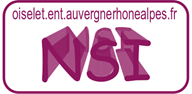
# Application du cours sur les arbres
D’après le cours de  Frédéric Mandon sous licence Creative Commons BY NC SA, http://creativecommons.org/licenses/by-nc-sa/3.0/fr/


# Les arbres

## Rappel de cours : 
Un arbre est constitué :
- d'une racine, sommet de "départ" de l'arbre ;
- de noeuds, sommets intermédiaires de l'arbre ;
- de feuilles, sommets "finaux" de l'arbre ;
- et de branches, qui relient les éléments précédents entre eux.

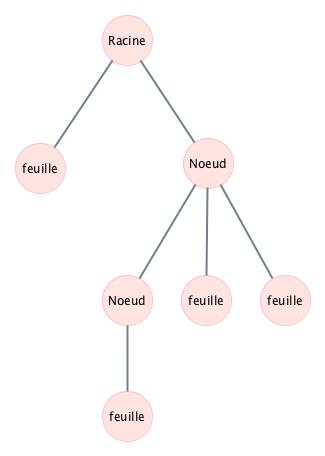

## Implémentation en python :

Il existe de nombreuses façon de coder un arbre, voici une première possibilité :
### Avec des listes
On utilise une liste, qui contient, la racine, suivi du fils gauche puis du fils droit. Chaque fils peut être à son tour un arbre (donc une liste).

Créer une fonction `noeud`qui reçoit en paramètres l'étiquette, le fils droit et le fils gauche (les fils sont à `None` par défaut), et qui renvoit la liste.

1. Utiliser votre fonction pour créer l'arbre ci-dessous.
  1. Première solution : créer chaque feuille, puis les noeuds portants les feuilles, jusqu'à la racine
  2. Deuxième solution : Créer en une seule ligne la racine 

2. Afficher la liste contenant votre arbre créé avec les 2 solutions.
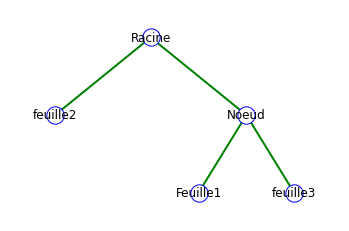

3. Toujours avec cette implémentation, afficher l'étiquette du fils gauche du fils droit de la racine.

In [ ]:
#étiquette du fils gauche du fils droit de la racine


4. Ajouter un fils droit au fils gauche de la racine.

### Avec des dictionnaires
On vous demande maintenant d'implémenter l'arbre avec des dictionnaires.
Chaque noeud est représenté par un dictionnaire qui a comme clé **racine**, **fg** et **fd**.

Comme pour les listes, chaque fils peut être un noeud ou alors vide, valeurs par défaut `None`

Reprendre les points 1,2,3 et 4 de 



### Avec un objet ArbreB
On donne l'implémentation suivante de la structure de données "arbre".

In [ ]:
class ArbreB:
    def __init__(self, valeur, gauche = None, droit = None):
        self.noeud = valeur
        self.gauche = gauche
        self.droit = droit        
    
    def __str__(self):
        # cette fonction surcharge la fonction print() afin de l'utiliser sur une instance ArbreB
        return str(self.noeud)+str(self.gauche).replace('None','.')+str(self.droit).replace('None','.')

Créer cet arbre et l'afficher avec la fonction print()
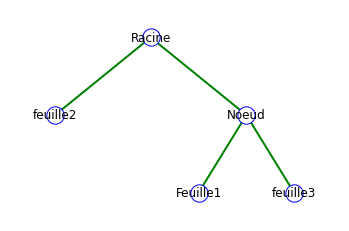

### Méthodes et fonctions de base

1. Construire l'arbre donné : 
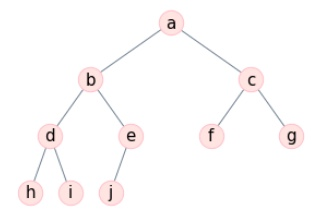
2. Ecrire une méthode estVide() renvoyant vrai si l'arbre est vide
3. Ecrire une méthode estFeuille() renvoyant un booléen Vrai si l'arbre est une feuille
2. Ecrire une fonction donnant la taille de l'arbre, et une autre fonction donnant la hauteur de l'arbre (on peut faire une méthode, c'est un peu plus besogneux)

## Algorithmes sur les arbres binaires
A partir de l'implémentation précedente (POO) de la structure de données "arbre".

___
# Avant de continuer ce travail, prendre connaissance de la suite du cours dans le fichier "Arbres- Structure de données (suite).pdf"

___



### Parcours
#### En profondeur
Ecrire les trois fonctions de parcours préfixe, infixe et suffixe d'un arbre. 

In [ ]:
def parcoursPrefixe(arbre , parcours):

    return parcours

def parcoursInfixe(arbre , parcours):

    return parcours

def parcoursSuffixe(arbre , parcours):

    return parcours

prefixe = parcoursPrefixe(arbre_a, [])
infixe = parcoursInfixe(arbre_a, [])
suffixe = parcoursSuffixe(arbre_a, [])
print("prefixe : ", prefixe)
print("infixe : ", infixe)
print("suffixe : ", suffixe)

### En largeur
Appliquer l'algorithme du cours pour donner le parcours en largeur d'un arbre.
On peut utiliser pour la file la classe "deque" du module "collections" qui se comporte comme une "liste améliorée" avec notament les méthodes : 

- `append` : ajoute un élement à droite
- `appendleft`	 : ajoute un élement à gauche
- `pop`	: supprime et retourne l'élement le plus à droite
- `popleft`	: supprime et retourne l'élement le plus à gauche

In [ ]:
from collections import deque

def parcoursLargeur(arbre):
    file = deque()
    parcours = []

    return parcours

largeur = parcoursLargeur(arbre_a)
print(largeur)
        
    

### Un utilitaire pour la suite du notebook
L'utilitaire suivant permet de tracer des arbres binaires.
Vous aurez peut être à installer la bibliothèque `networks`. 

Pour celà dans la console taper :
`pip install networkx`

In [ ]:
# utilitaire pour représenter les arbres binaires
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

def hauteur(arbre):
    if arbre is None:
        return 0
    else:
        return 1 + max(hauteur(arbre.gauche), hauteur(arbre.droit))
    
def parkour(arbre, noeuds, branches, position, profondeur, pos_courante):
    if arbre is not None:
        noeuds.append(arbre.noeud)            # on complète la liste des noeuds
        position[arbre.noeud] = (pos_courante,profondeur)     # ... et la liste des positions
        profondeur -= 1 
        if arbre.gauche is not None:
            branches.append((arbre.noeud, arbre.gauche.noeud))  #... et la liste des branches
            parkour(arbre.gauche, noeuds, branches, position, profondeur, 
                    pos_courante - 2**(profondeur - 1))
        if arbre.droit is not None:
            branches.append((arbre.noeud, arbre.droit.noeud))
            parkour(arbre.droit, noeuds, branches, position, profondeur, 
                    pos_courante + 2**(profondeur - 1))
    return noeuds, branches, position 


def repr_graph(arbre):
    noeuds = []             #liste des noeuds, racines et feuilles de l'arbre
    branches =[]            # liste des branches de l'arbre
    profond = hauteur(arbre)        #hauteur de l'arbre
    pos_courante = 2**(profond - 1)   # position de la racine (en abscisse)
    position = {}                # dictionnaire des positions des noeuds sur la figure
     
    # appel d'une fonction récursive de parcours, ici prefixe mais ça n'a pas d'importance
    # on récupère : la liste des noeuds, la liste des branches,
    # le dictionnaire des positions des noeuds
    noeuds, branche, position  = parkour(arbre, noeuds, branches, position, profond, pos_courante)    
    #print(position)

    mon_arbre = nx.Graph()          # objet Graphe de la bibliothèque Networkxx
    mon_arbre.add_nodes_from(noeuds)
    mon_arbre.add_edges_from(branches)
    #print(list(arbre.nodes))
    #print(list(arbre.edges))
    #Si vous voulez changer des couleurs, amusez-vous ci-dessous
    #Plein de noms de couleurs là : http://www.letoileauxsecrets.fr/couleurs/couleurs-gris.html
    options = {
        "font_size": 12,
        "node_size": 300,
        "node_color": "white",
        "edge_color" : "green",
        "edgecolors": "blue",
        "linewidths": 1,
        "width": 2,
    }
    # plt.figure(figsize=(12,8))     # pour changer la taille de la figure
    nx.draw_networkx(mon_arbre, pos = position, **options)
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()
    return(mon_arbre)      #on renvoie l'objet graphe networkxx au cas où


arbre = repr_graph(arbre_a)




### Exercice : reconstruction d'un arbre
Avec la déforestation massive, il est important de savoir reconstruire les arbres (désolé...). 
Le but de cet exercice est de reconstruire un arbre connaissant son parcours infixe et son parcours suffixe.  
_Exemple_ :   
Le parcours infixe d'un arbre est `[4, 8, 2, 5, 1, 6, 3, 7]` 
le parcours suffixe de ce même arbre est `[8, 4, 5, 2, 6, 7, 3, 1]`
L'arbre correspondant est:  
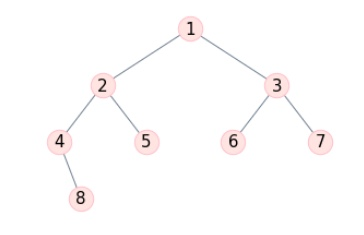
_Méthode_ :
1. Que représente le dernier noeud dans le parcours suffixe ?
2. Où sont situés dans l'arbre les noeuds présents avant le noeud 1, dans le parcours infixe ? Idem avec ceux qui sont après.
3. Itérer le processus, vérifier "à la main" que l'on obtient bien l'arbre ci-dessus.  
  
Ecrire une fonction (récursive a priori) `constrArbre(infx, sufx, arbre)` qui implémente cette méthode. La fonction renverra un objet Arbre. On supposera que les parcours infixe et suffixe sont cohérents.  
On pourra s'aider des spécifications suivantes.

In [ ]:
class ArbreB:
    def __init__(self, valeur, gauche = None, droit = None):
        self.noeud = valeur
        self.gauche = gauche
        self.droit = droit
    def __repr__(self):
        return str(self.noeud) +str(self.gauche).replace('None','.')+str(self.droit).replace('None','.')

def indexRacineSufx(infx, sufx, debut_infx, fin_infx):
    """
    Renvoie l'index de la racine d'un sous-arbre, dont le parcours infixe est donné par infx[ind_debut, ind_fin]
    Le parcours suffixe du sous_arbre n'est pas donné mais peut s'extraire de sufx
    l'index est celui de la racine dans le parcours suffixe sfx
    @param infx : liste du parcours infixe de l'arbre 
    @param sufx : liste du parcours suffixe de l'arbre 
    @param debut_infx, fin_infx : indices de début et de fin du sous-arbre dans le parcours infixe
    @return ind_racine : indice de la racine du sous-arbre dans le parcours suffixe
    """
    ind_racine = 0

    return ind_racine

def constrArbre(infx, sufx, debut_infx, fin_infx):
    """
    Construit un arbre à partir des parcours infixe et suffixe
    @param infx : liste des sommets de l'arbre dans le parcours infixe 
    @param sufx : liste des sommets de l'arbre dans le parcours suffixe 
    @param arbre : objet de la classe Arbre en cours de construction 
    @return arbre : arbre construit 
    """
    if debut_infx >= fin_infx :
        return None
    else:
        arbre = ArbreB(None)
        
        return arbre

infixe = [4, 8, 2, 5, 1, 6, 3, 7]
suffixe = [8, 4, 5, 2, 6, 7, 3, 1]

arbre = constrArbre(infixe, suffixe, 0, len(infixe))
print(arbre)
arbrenx = repr_graph(arbre)

### Autres reconstructions (exercice "papier")
On connaît quatre parcours d'arbre:
* prefixe
* infixe
* suffixe
* en profondeur  
  
  
On peut donc écrire différents algorithmes pour reconstruire un arbre à partir de deux de ces parcours. Sauf que certaines des combinaisons ne donnent pas un arbre unique ! A vous de trouver lesquelles fonctionnent, et surtout lesquelles ne fonctionnent pas, à l'aide de contre-exemples simples.

### Exercice : un jeu qui apprend de ses erreurs
_Un exemple de Bruno Mermet_   
Votre ordinateur est comme un enfant (et comme l'immense majorité des gens) : il veut apprendre à reconnaitre les animaux. Initialement, il ne connait pas grand chose. il sait juste qu'il y a un animal qui a des pattes et qui s'appelle un âne, et un autre animal qui n'a pas de pattes et qui s'appelle une raie.  
Le programme propose alors à l'utilisateur de penser à un animal, et il va essayer de trouver de quel animal il s'agit. S'il échoue, il demande à l'utilisateur à quel animal il pensait, et quelle question permettrait de le distinguer de l'animal qu'il a proposé. Au prochain essai, le programme aura ainsi enrichi sa base de connaissance. Même si ce programme paraît simpliste, c'est un exemple d'IA.  
La classe ArbreB donnée ci-dessus est-elle adaptée à ce problème ? C'est une question réthorique, voici la réponse : oui et non. On peut la conserver, en modifiant et précisant son comportement. Un noeud sera un couple `(est_feuille , texte)`. `est_feuille` est un booléen qui précise si le noeud est une feuille, donc un animal. Sinon le noeud représente une question à poser. On peut tout aussi bien appeler ce booléen `est_Animal`. `texte` est une chaîne de caractères donnant soit le nom de l'animal, soit la question à poser. On peut également appeler les fils gauche (respectivement droit) fils oui (respectivement non).  
Programmer le jeu. On peut utiliser l'utilitaire précédent pour représenter l'arbre.

## Algorithmes sur les arbres binaires de recherche
1. Ecrire une fonction qui donne le maximum d'un ABR. Analyser sa complexité
2. Implémenter les algorithmes de recherche et d'insertion dans un ABR
3. Implémenter l'algorithme d'insertion dans un ABR